In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string
import re

In [3]:
data = pd.read_csv('Twitter_Data.csv')
stop_words = set(stopwords.words('english'))
tweet = data['tweets'].head(500)
label = data['label'].head(500)
vocab=[]
for i in tweet:
    i = i.translate(str.maketrans('', '', string.punctuation))
    
    url_pattern = r'https?://\S+|www\.\S+'
    processed_sentence = re.sub(url_pattern, '', i)
    
    word_tokens = word_tokenize(processed_sentence)
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
    for j in filtered_tweet:
        vocab.append(j)
    # vocab.append(w for w in filtered_tweet)

vocab = list(set(vocab))

res = []


for i in tweet:
    i = i.translate(str.maketrans('', '', string.punctuation))
    url_pattern = r'https?://\S+|www\.\S+'
    processed_sentence = re.sub(url_pattern, '', i)
    
    word_tokens = word_tokenize(processed_sentence)
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
    tmp = [0]*len(vocab)
    for w in filtered_tweet:
        idx = vocab.index(w)
        tmp[idx] = tmp[idx] + 1
    res.append(tmp)

print(len(vocab))
print(res)
print(len(res))

3052
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [4]:
X_train = np.array(res)
nature = [1 if element == 1 else 0 for element in label]
y_train = np.array(nature)

In [5]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [6]:
def compute_cost(X, y, w, b):
    m, n = X.shape
    cost=0.0
    for i in range (m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
    total_cost = cost / m
    return total_cost

In [7]:
def compute_gradient(X, y, w, b): 

    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i  in range(m):
        f_wb_i=sigmoid(np.dot(X[i],w)+b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j]=dj_dw[j]+err_i*X[i,j]
        dj_db=dj_db + err_i
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    
    return dj_db, dj_dw

In [8]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 

    m = len(X)

    J_history = []
    w_history = []
    
    for i in range(num_iters):

        dj_db, dj_dw = gradient_function(X, y, w_in, b_in)   

        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              

        if i<100000:  
            cost =  cost_function(X, y, w_in, b_in)
            J_history.append(cost)

        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history 

In [9]:
initial_w = np.zeros(3052)
initial_b = 0

# iterations = 10000
iterations = 500

alpha = 0.8

w,b, J_history, w_history = gradient_descent(X_train ,y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print(f"b,w found by gradient descent: {b:0.2f},{w} ")

Iteration    0: Cost     0.68   
Iteration   50: Cost     0.44   
Iteration  100: Cost     0.34   
Iteration  150: Cost     0.28   
Iteration  200: Cost     0.24   
Iteration  250: Cost     0.21   
Iteration  300: Cost     0.18   
Iteration  350: Cost     0.16   
Iteration  400: Cost     0.15   
Iteration  450: Cost     0.14   
Iteration  499: Cost     0.13   
b,w found by gradient descent: -1.37,[ 0.37179326  0.17496987 -0.06870366 ... -0.26738133  0.3247864
 -0.3611445 ] 


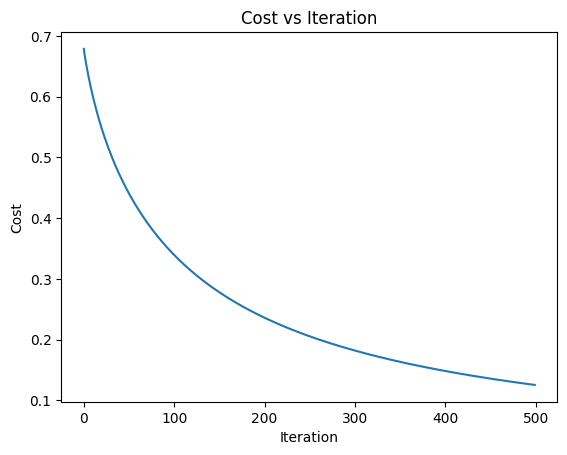

In [10]:
plt.plot(range(len(J_history)), J_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iteration')
plt.show()

In [ ]:
# print(vocab)
s=input("Enter the sentence :")
i=s
total_word=[]

net_res=[]
i = i.translate(str.maketrans('', '', string.punctuation))
url_pattern = r'https?://\S+|www\.\S+'
processed_sentence = re.sub(url_pattern, '', i)
    
word_tokens = word_tokenize(processed_sentence)
filtered_tweet = [a for a in word_tokens if not a in stop_words]
tmp = [0]*len(vocab)
for j in filtered_tweet:
    if j in vocab:
        idx = vocab.index(j)
        tmp[idx] = tmp[idx] + 1
net_res.append(tmp)

# print(net_res)

f=sigmoid(np.dot(net_res,w)+b)
# print(f)

if f>= 0.4:
    print("Positive")
else:
    print("Negative")

In [12]:
# print(vocab)
data = pd.read_csv('Twitter_Data.csv')
stop_words = set(stopwords.words('english'))
tweet = data['tweets'].head(500)
label = data['label'].head(500)

right=0
total=0


for s in range (len(tweet)):
    i=tweet[s]
    net_res=[]
    i = i.translate(str.maketrans('', '', string.punctuation))
    url_pattern = r'https?://\S+|www\.\S+'
    processed_sentence = re.sub(url_pattern, '', i)
    
    word_tokens = word_tokenize(processed_sentence)
    filtered_tweet = [a for a in word_tokens if not a in stop_words]
    tmp = [0]*len(vocab)
    for j in filtered_tweet:
        if j in vocab:
            idx = vocab.index(j)
            tmp[idx] = tmp[idx] + 1
    net_res.append(tmp)

    # print(net_res)

    f=sigmoid(np.dot(net_res,w)+b)

    if (f>= 0.4) and (label[s]==1):
        right +=1
        total+=1
    elif (f<0.4) and (label[s]==-1):
        right+=1
        total+=1
    else:
        total+=1

print((right/total)*100)





# s=input("Enter the sentence :")
# i=s
# total_word=[]

# net_res=[]
# i = i.translate(str.maketrans('', '', string.punctuation))
# url_pattern = r'https?://\S+|www\.\S+'
# processed_sentence = re.sub(url_pattern, '', i)
    
# word_tokens = word_tokenize(processed_sentence)
# filtered_tweet = [a for a in word_tokens if not a in stop_words]
# tmp = [0]*len(vocab)
# for j in filtered_tweet:
#     if j in vocab:
#         idx = vocab.index(j)
#         tmp[idx] = tmp[idx] + 1
# net_res.append(tmp)

# # print(net_res)

# f=sigmoid(np.dot(net_res,w)+b)
# # print(f)

# if f>= 0.4:
#     print("Positive")
# else:
#     print("Negative")

62.6


In [13]:
m, n = X_train.shape
correct=0
for i  in range(m):
    f_wb_i=sigmoid(np.dot(X_train[i],w)+b)
    print(f_wb_i, "and", y_train[i])
    if f_wb_i>=0.5 and y_train[i]==1:
        correct+=1
    elif f_wb_i<=0.5 and y_train[i]==0:
        correct+=1
print(correct/m)
print(m)
    # err_i = abs(f_wb_i - y_train[i])
    # print(err_i)

0.03723191514584052 and 0
0.0738964501567317 and 0
0.8087237097504587 and 1
0.9186437490821933 and 1
0.7842817748211701 and 1
0.07131738043703775 and 0
0.11157349367642355 and 0
0.08994469357999242 and 0
0.975936210444633 and 1
0.43698038395772665 and 1
0.9335679553126938 and 1
0.802241397115579 and 1
0.6272239174486615 and 1
0.021681359325446944 and 0
0.049139373413707485 and 0
0.1208580356926997 and 0
0.0898336266463867 and 0
0.0482997372562198 and 0
0.9814256088612051 and 1
0.018576919071674376 and 0
0.931916852307569 and 1
0.08396069158537883 and 0
0.06310214802557476 and 0
0.045991457456604455 and 0
0.15726071598511895 and 0
0.9531288327718335 and 1
0.10013215915540984 and 0
0.1613737843246844 and 0
0.037668716396103245 and 0
0.0920599570530918 and 0
0.8671033599848069 and 1
0.021300383644487438 and 0
0.037645211536511076 and 0
0.912310870458864 and 1
0.1387312941803386 and 0
0.23419100295466486 and 0
0.6290361386768927 and 1
0.9455424285639511 and 1
0.05413378522283379 and 0
0.08